In this notebook we plot signals of different clusters and with different parameters to see whether we can visually distinguish true and spurious PAC. 

### Imports

In [1]:
import os 
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import hilbert


os.chdir(r'C:\Users\jaapv\Desktop\master\VoytekLab\Code\distinguish_pac')
import module_pac_functions as pacf

# 3 polycoherence
from polycoherence import _plot_signal, polycoherence, plot_polycoherence
from math import pi
from scipy.fftpack import next_fast_len

In [2]:
# Set directory in which the data structure can be found
os.chdir(r'C:\Users\jaapv\Desktop\master\VoytekLab')

# Use Pickle to load data
load_data = open('clean_db_20s_clustered.pkl','rb')
clean_db = pickle.load(load_data)

In [3]:
# Extract variables for clean_db
subj_name   = clean_db['subj_name']
subj        = clean_db['subj']
ch          = clean_db['ch']
ep          = clean_db['ep']
locs        = clean_db['locs']
dat_name    = clean_db['dat_name']
data        = clean_db['data']
pac_rhos    = clean_db['pac_rhos']
resamp_zvals = clean_db['resamp_zvals']
resamp_pvals = clean_db['resamp_pvals']
psd_params  = clean_db['psd_params']
backgr_params = clean_db['backgr_params']
rd_sym      = clean_db['rd_sym']
pt_sym      = clean_db['pt_sym']
bursts      = clean_db['bursts']
period      = clean_db['period']
volt_amp    = clean_db['volt_amp']
fs          = clean_db['fs']
clusters    = clean_db['clusters']

# For some variables, calculate the mean, median and/or STD
mean_rd_sym     = [np.mean(rd_sym[ii]) for ii in range(len(rd_sym))]
median_rd_sym   = [np.median(rd_sym[ii]) for ii in range(len(rd_sym))]
std_rd_sym      = [np.std(rd_sym[ii]) for ii in range(len(rd_sym))]

mean_pt_sym     = [np.mean(pt_sym[ii]) for ii in range(len(pt_sym))]
median_pt_sym   = [np.median(pt_sym[ii]) for ii in range(len(pt_sym))]
std_pt_sym      = [np.std(pt_sym[ii]) for ii in range(len(pt_sym))]

median_volt_amp = [np.median(volt_amp[ii]) for ii in range(len(volt_amp))]
median_period   = [np.median(period[ii]) for ii in range(len(period))]

# Split psd_params into the Central Frequency, Amplitude and BandWidth
psd_cf          = [psd_params[ii][0] for ii in range(len(psd_params))]
psd_amp         = [psd_params[ii][1] for ii in range(len(psd_params))]
psd_bw          = [psd_params[ii][2] for ii in range(len(psd_params))]

# Also split the background_params into seperate parameters
backgr_offset = [backgr_params[ii][0] for ii in range(len(backgr_params))]
backgr_knee   = [backgr_params[ii][1] for ii in range(len(backgr_params))]
backgr_exp  = [backgr_params[ii][2] for ii in range(len(backgr_params))]

clean_db.clear()

In [4]:
cluster0_idx = np.squeeze(np.where(clusters==0))
cluster1_idx = np.squeeze(np.where(clusters==1))

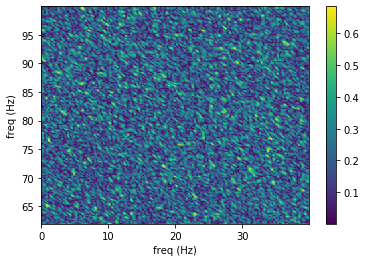

C:\Users\jaapv\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


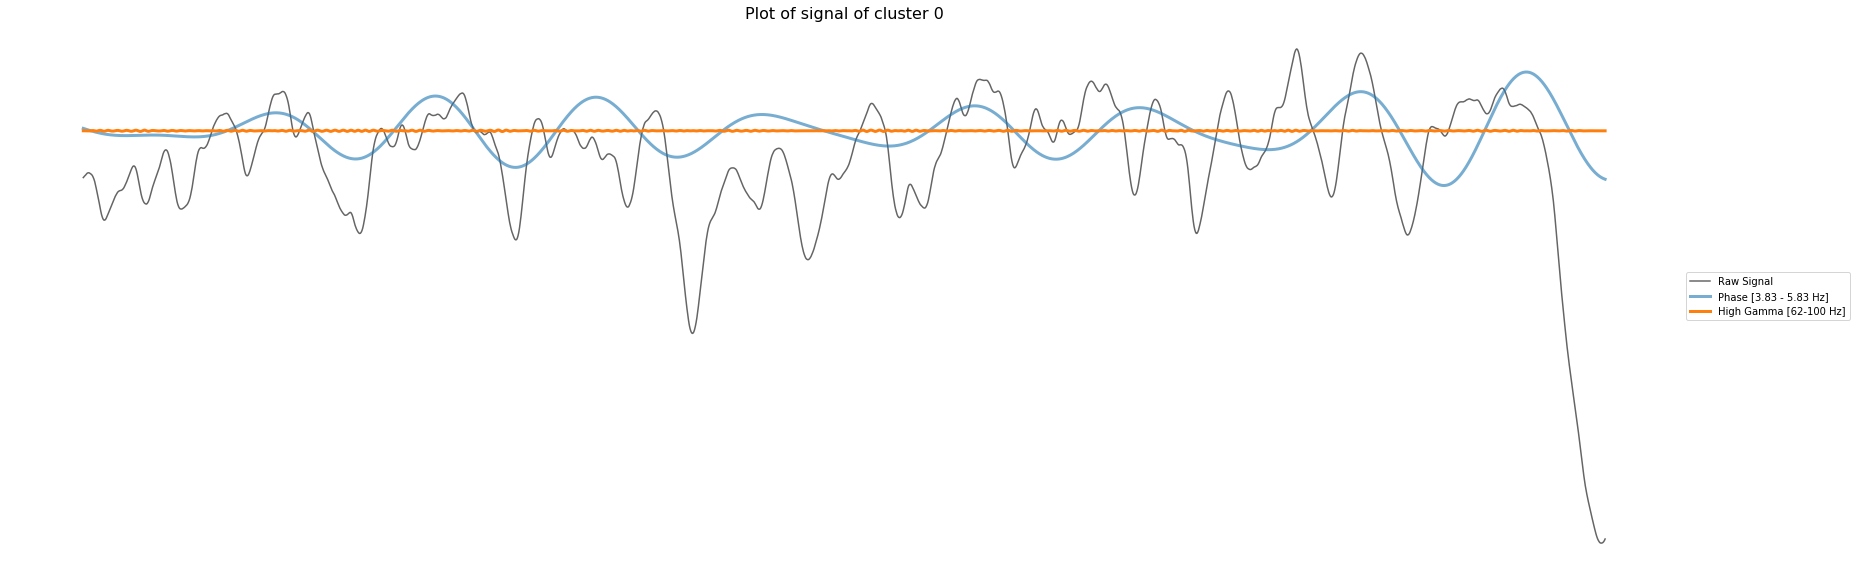

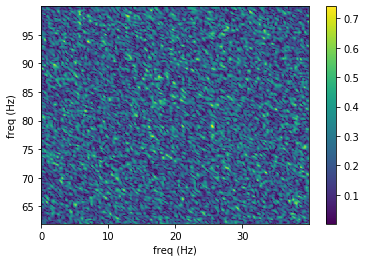

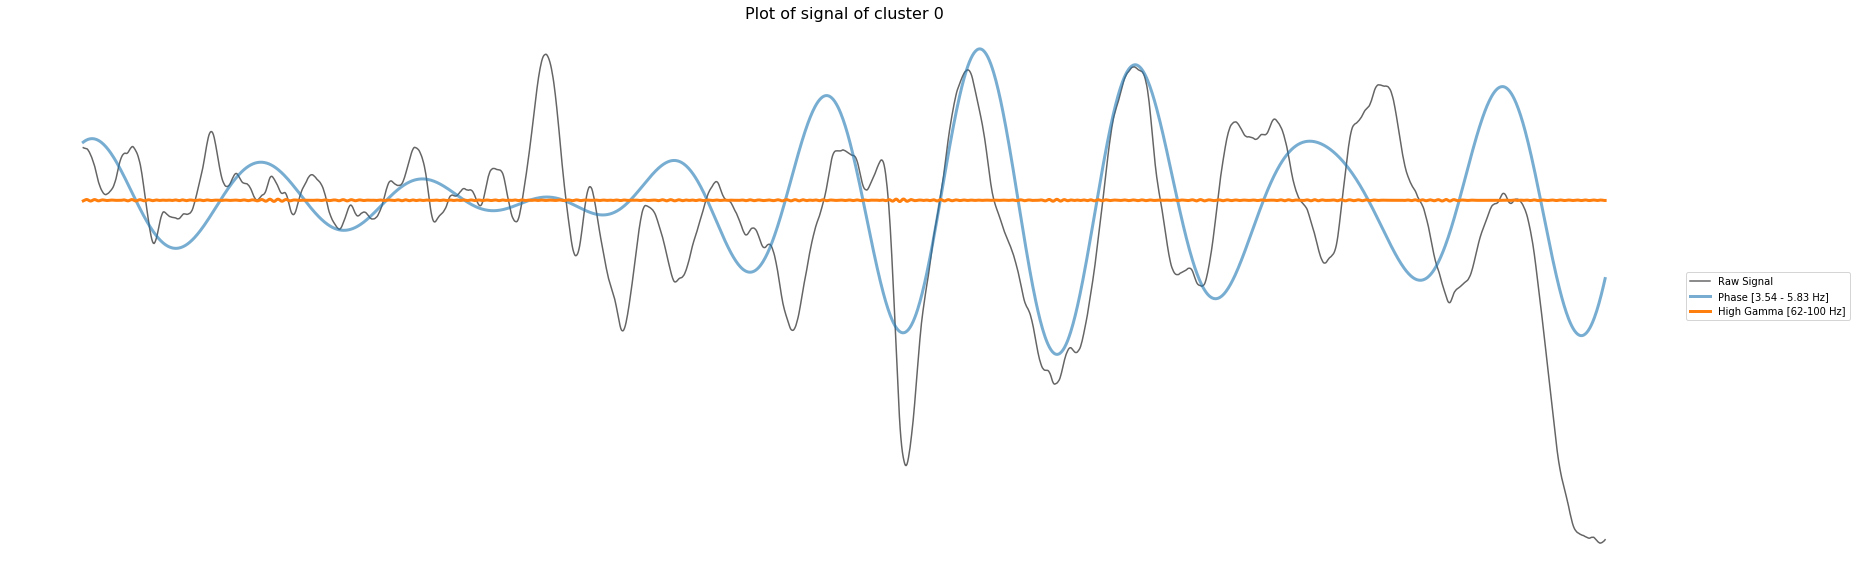

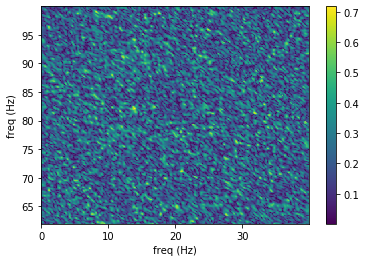

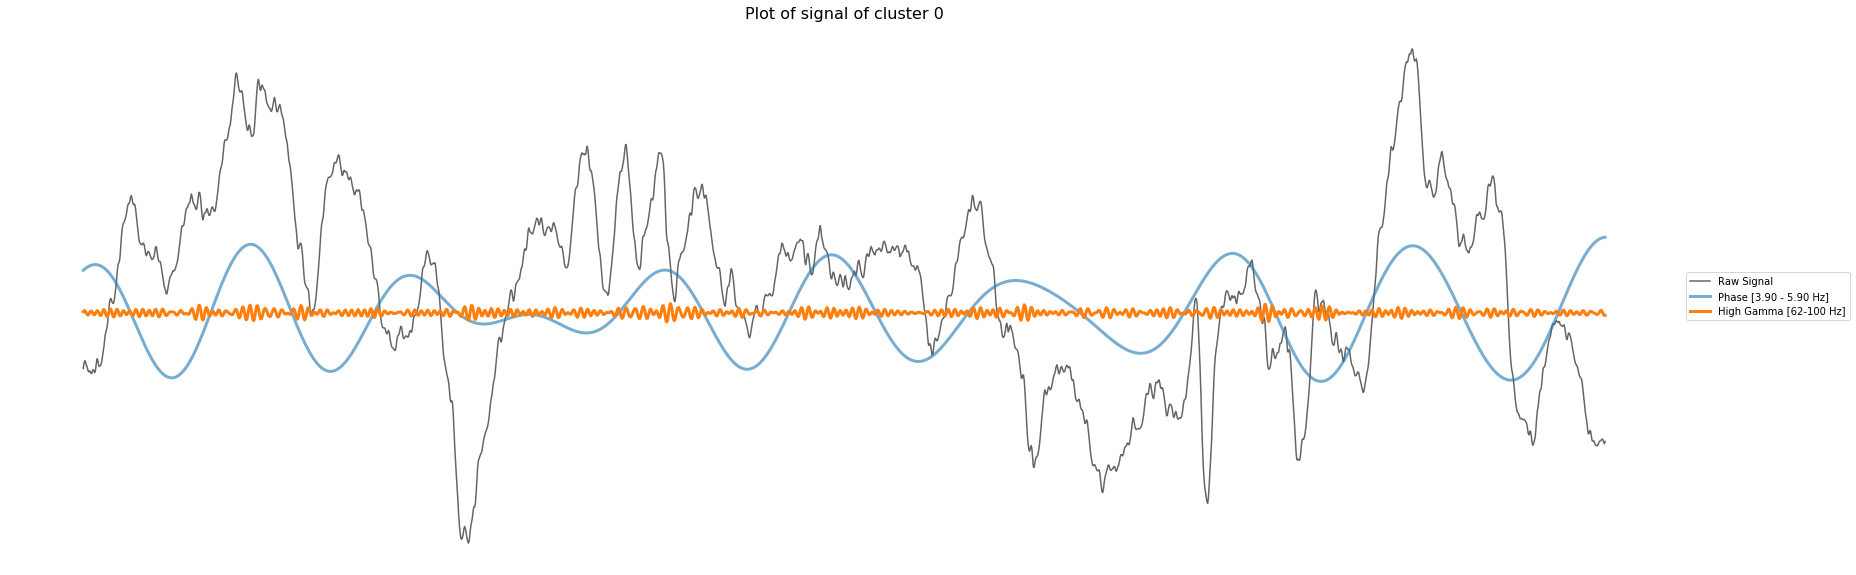

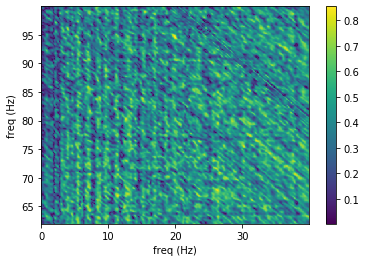

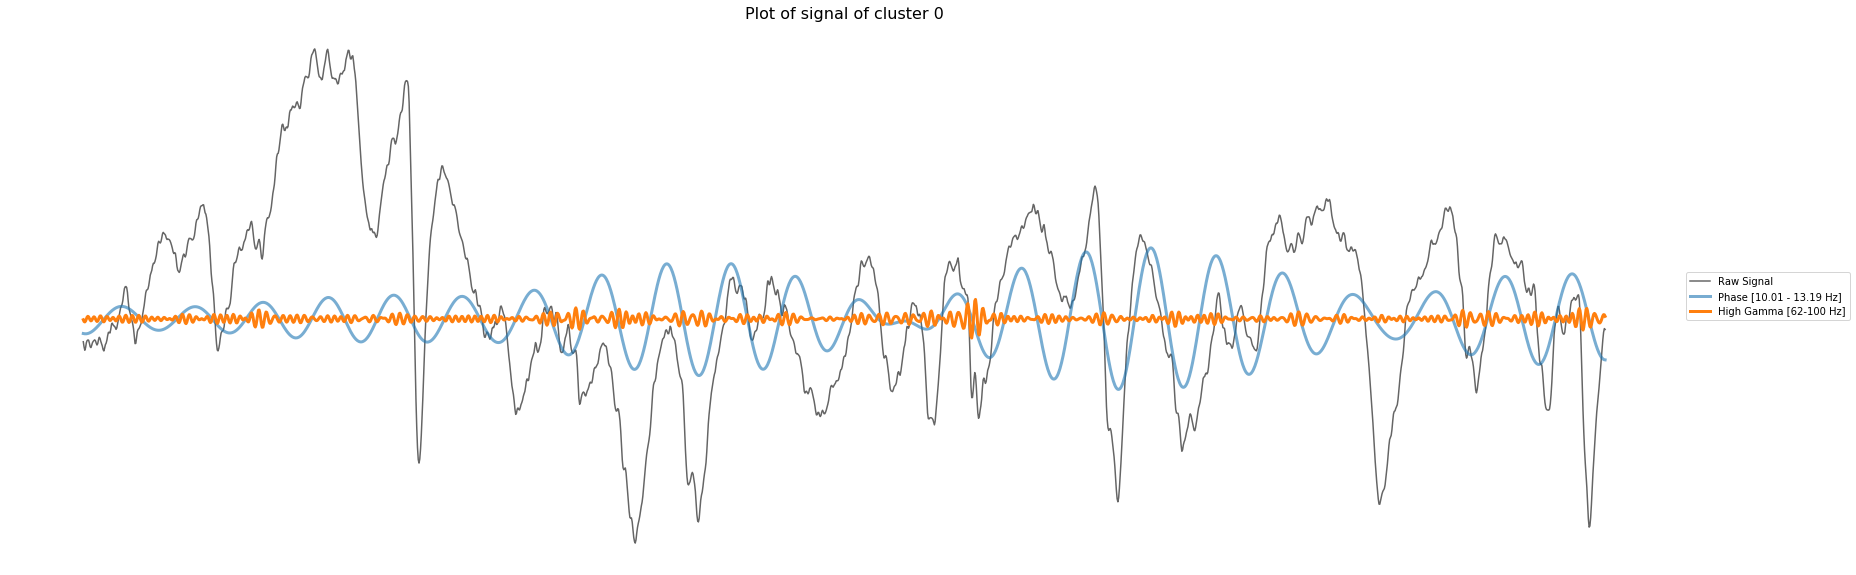

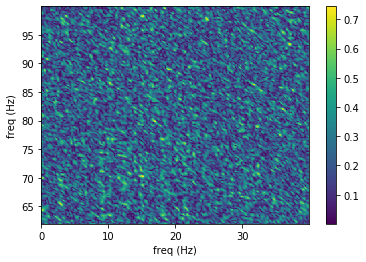

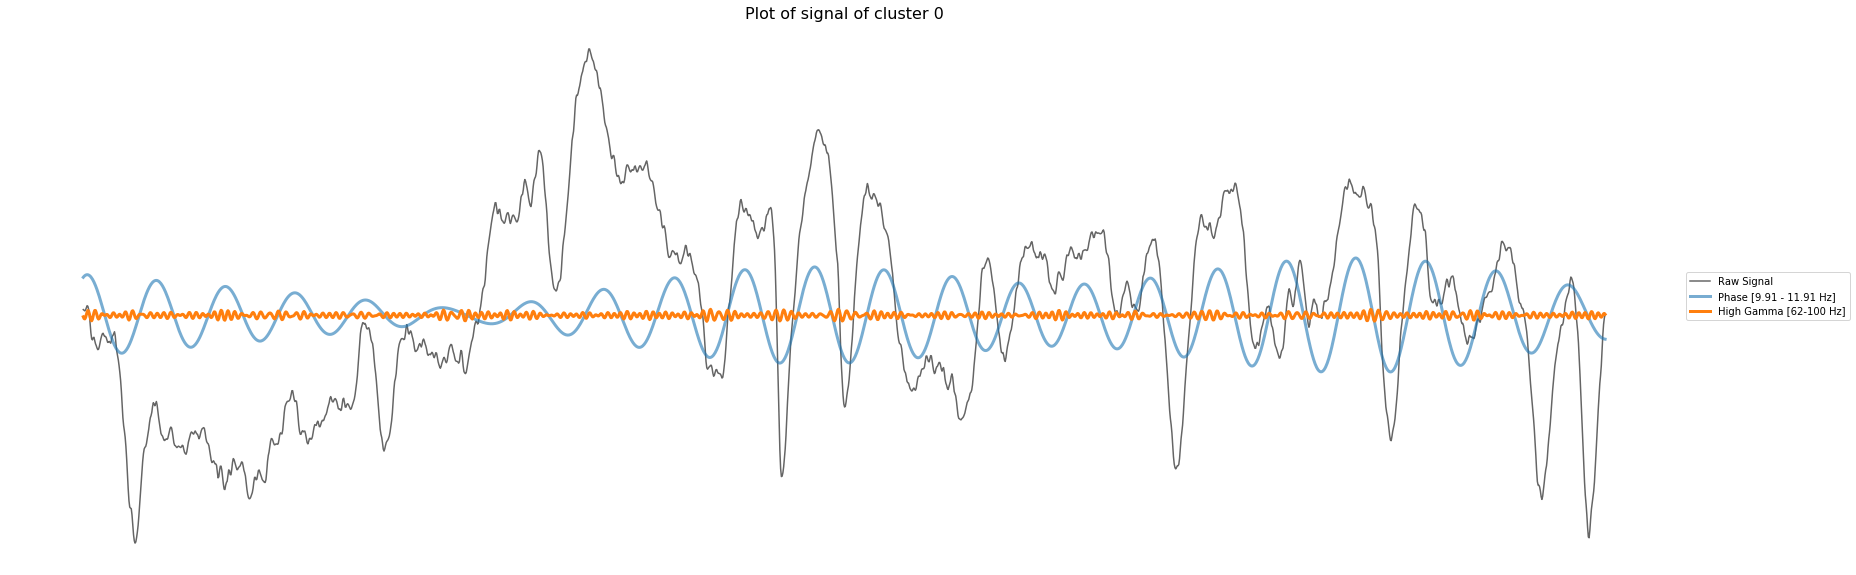

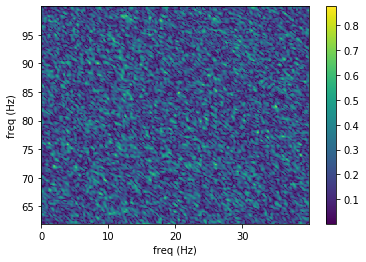

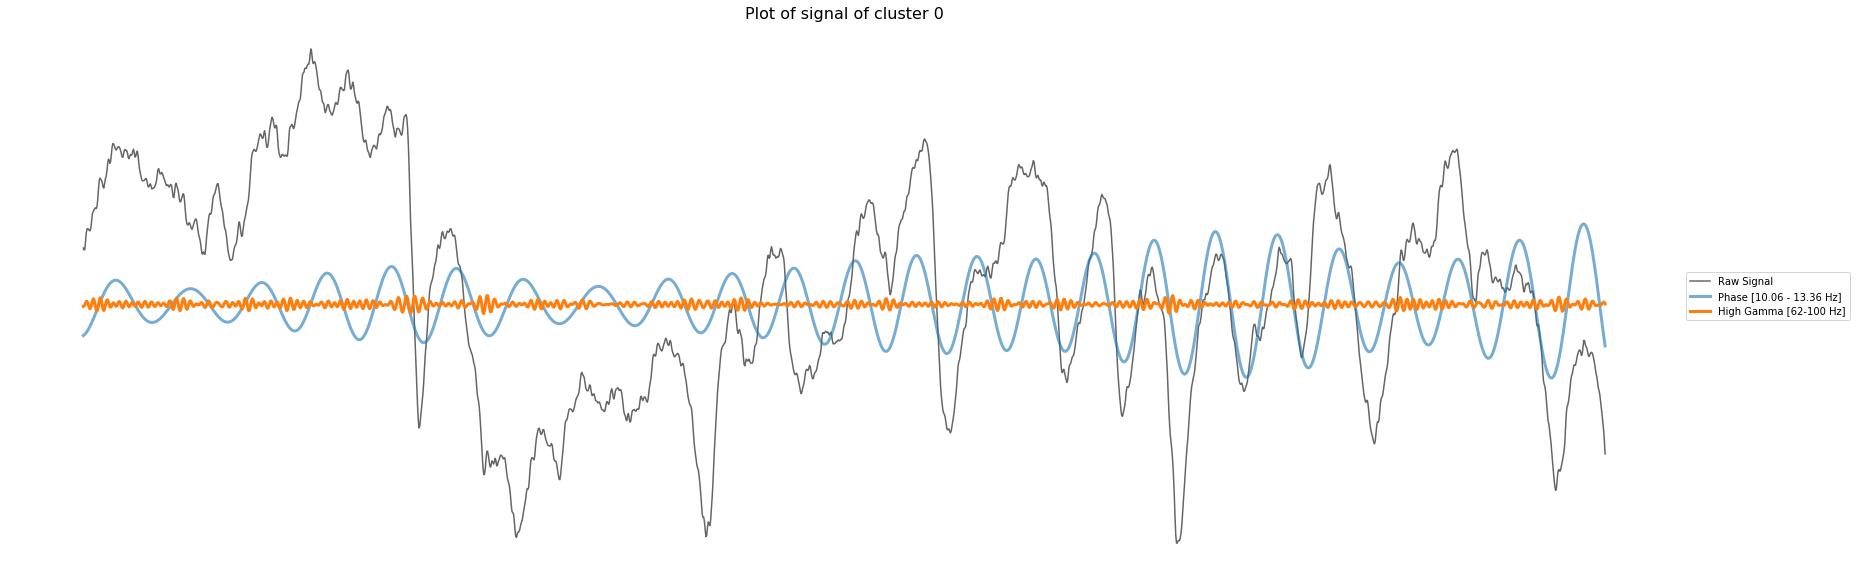

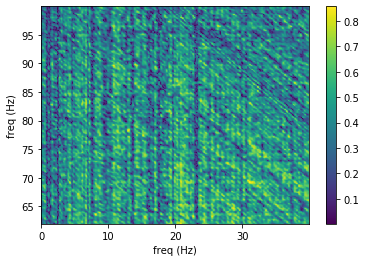

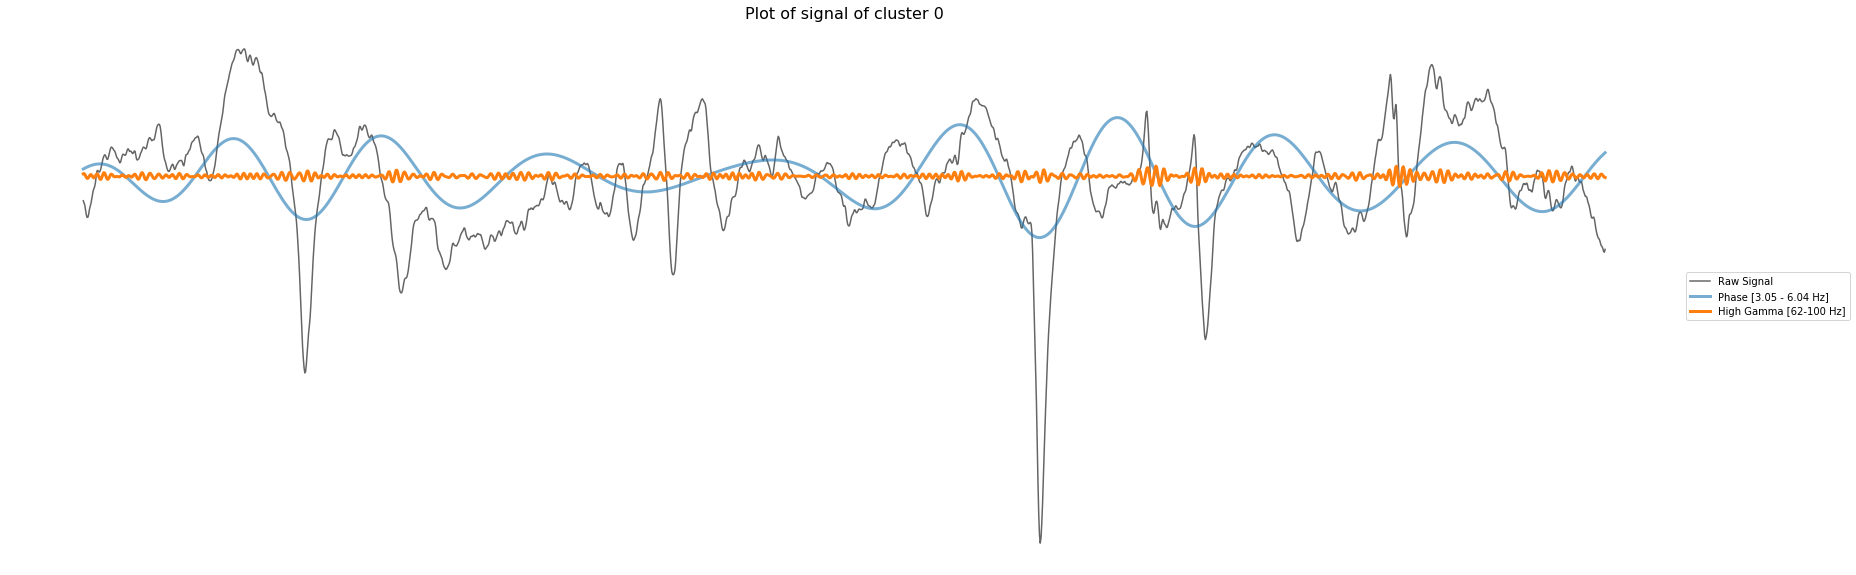

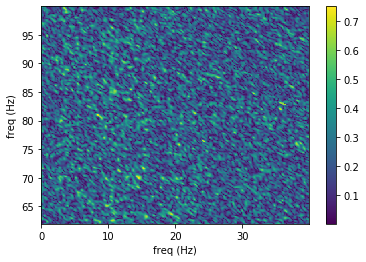

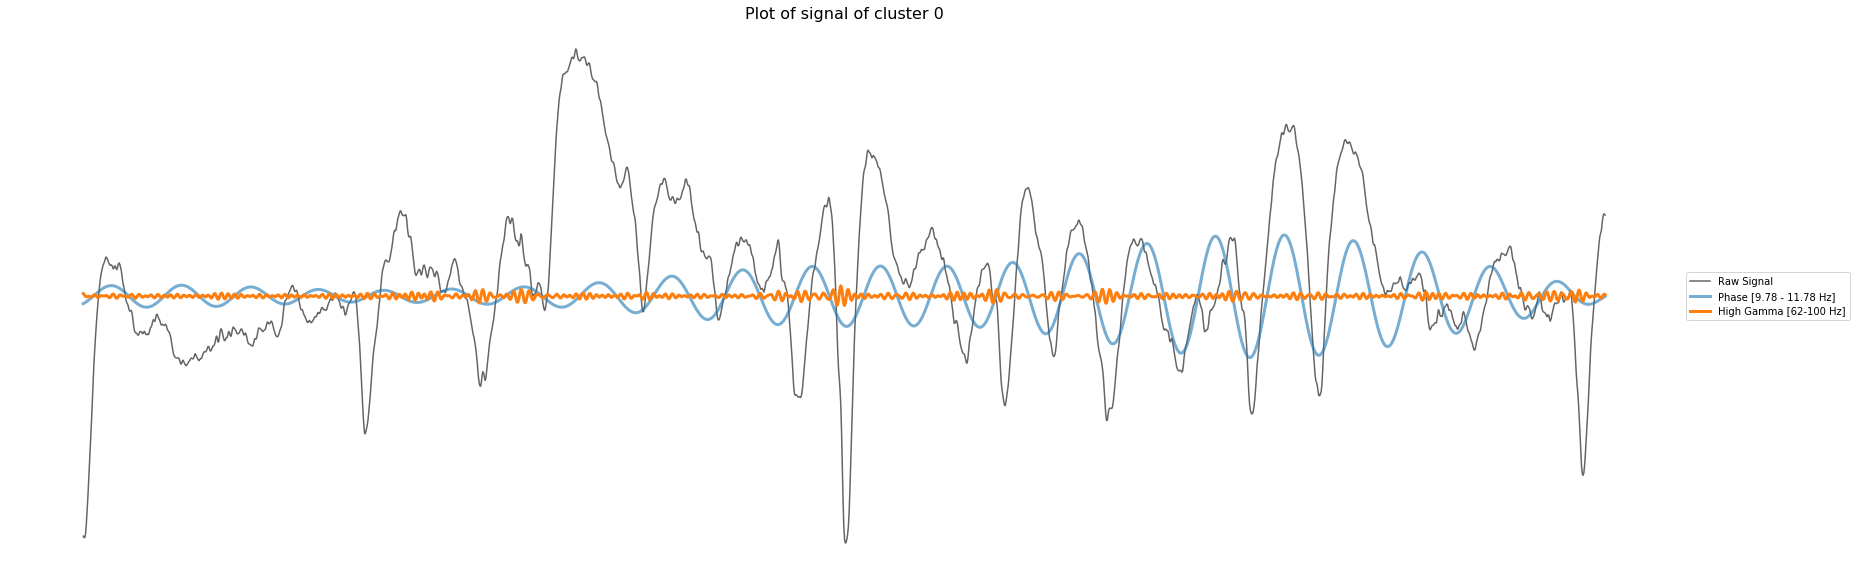

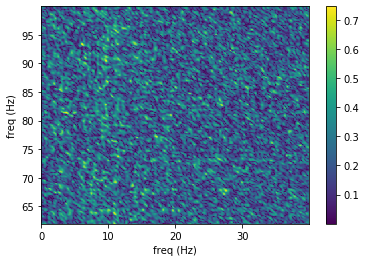

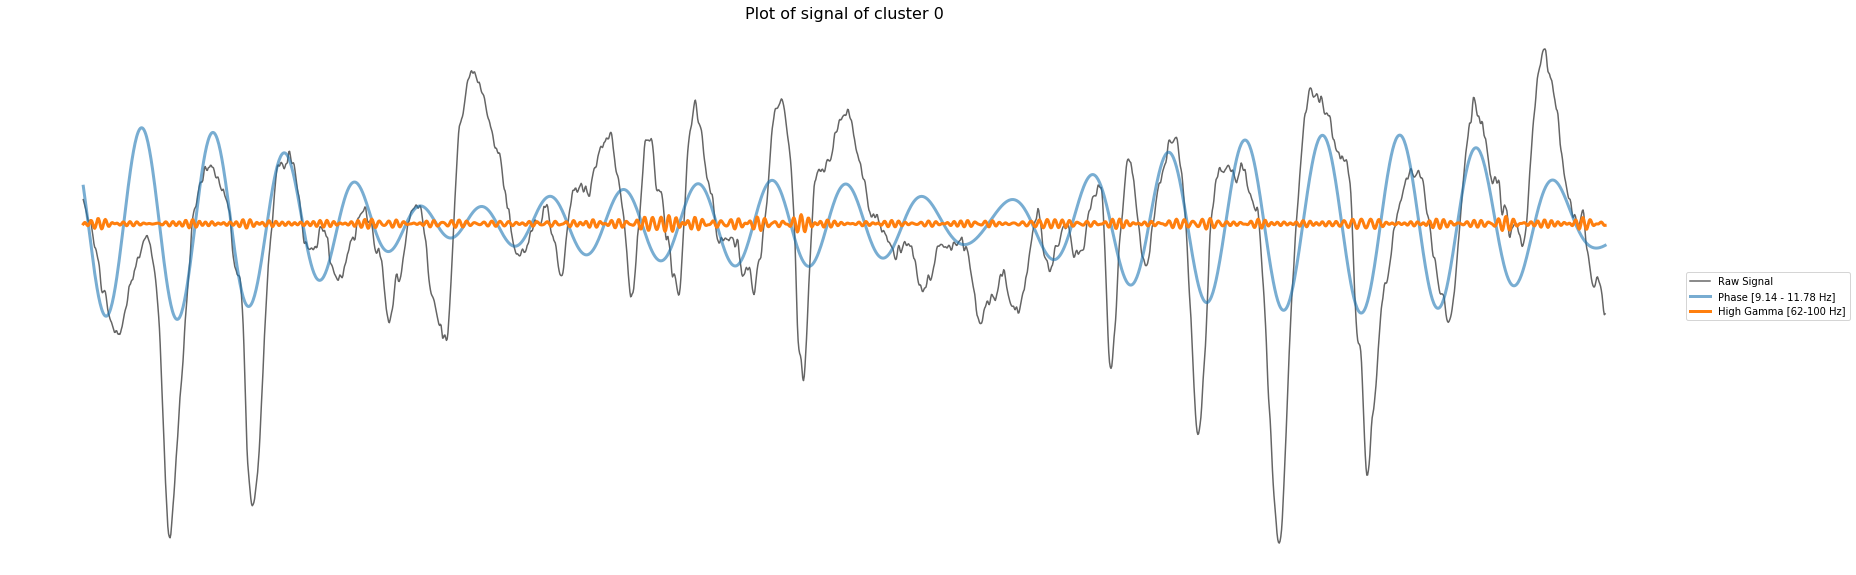

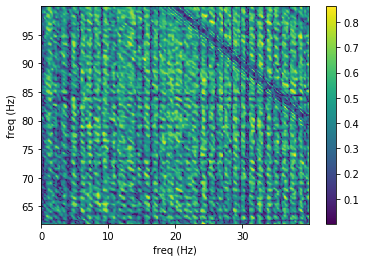

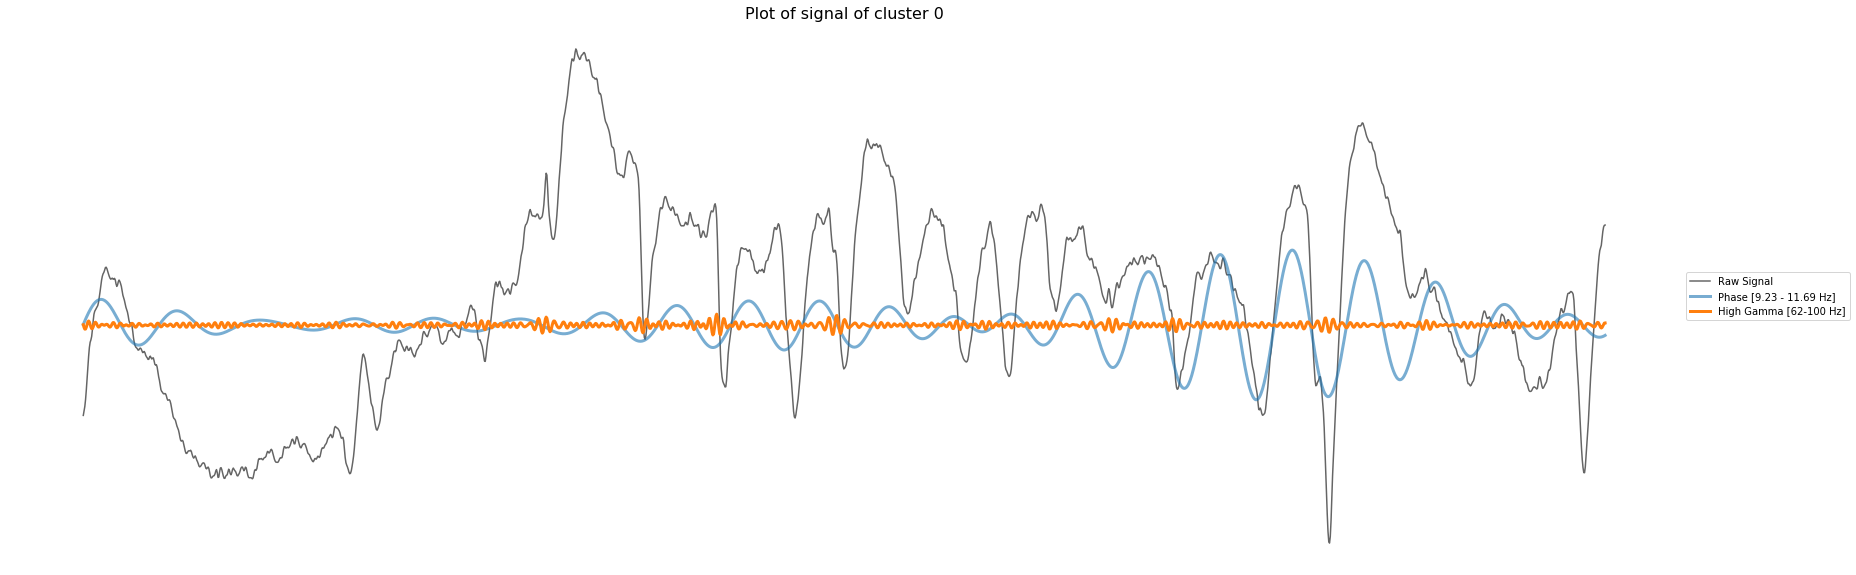

In [5]:
plt_time = [10 * fs, 12* fs]

for ii in range(0,10):

    ### CLUSTER 0
    sig = data[cluster0_idx[ii]]

    # compute phase band
    lower_phase = psd_cf[cluster0_idx[ii]] - (psd_bw[cluster0_idx[ii]] / 2)
    upper_phase = psd_cf[cluster0_idx[ii]] + (psd_bw[cluster0_idx[ii]] / 2)

    # phase providing band
    phase_providing_band = [lower_phase, upper_phase]; 

    # use butter bandpass filter to extract this frequency range
    phase_data = pacf.butter_bandpass_filter(sig, phase_providing_band[0], phase_providing_band[1], round(float(fs)));\

    # hilbert transfer data
    phase_data_hilbert = hilbert(phase_data);

    # calculate the phase of the signal by using angle 
    phase_data_angle = np.angle(phase_data_hilbert);

    # set range of the band 
    amplitude_providing_band = [62, 100]

    # use butter bandpass filter to extract this frequency range
    amp_data = pacf.butter_bandpass_filter(sig, amplitude_providing_band[0], amplitude_providing_band[1], round(float(fs)));

    # hilbert transform data
    amp_data_hilbert = hilbert(amp_data);

    # calculate absolute values
    amp_data_abs = abs(amp_data_hilbert);  

    # plot biocoherence 
    #sig = sig[plt_time[0]:plt_time[1]]
    nn = len(sig)
    t = np.linspace(0, 100, nn)
    
    kw = dict(nperseg=nn // 10, noverlap=nn // 20, nfft=next_fast_len(nn // 2))
    
    freq1, freq2, bicoh = polycoherence(sig, fs, flim1=(62, 100), flim2=(0, 40), **kw)
    plot_polycoherence(freq1, freq2, bicoh)
    plt.show()

    # plot signal
    plt.figure(figsize=(30,10))
    #lt.subplot(outer_grid[0, 1:])
    plt.plot((sig[plt_time[0]:plt_time[1]]),label= 'Raw Signal', color='black', alpha=.6)
    plt.plot((phase_data_hilbert[plt_time[0]:plt_time[1]]),
             label= 'Phase [{0:.2f} - {1:.2f} Hz]'.format(phase_providing_band[0], phase_providing_band[1]),
             linewidth=3, alpha=.6)
    plt.plot((amp_data_hilbert[plt_time[0]:plt_time[1]]),label= 'High Gamma [62-100 Hz]',
             linewidth=3)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('Plot of signal of cluster 0', size=16)
    plt.axis('off')
    plt.show()

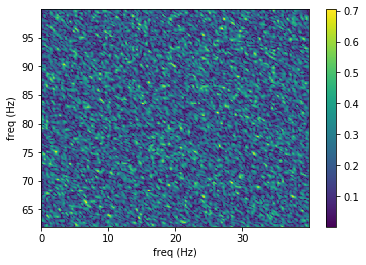

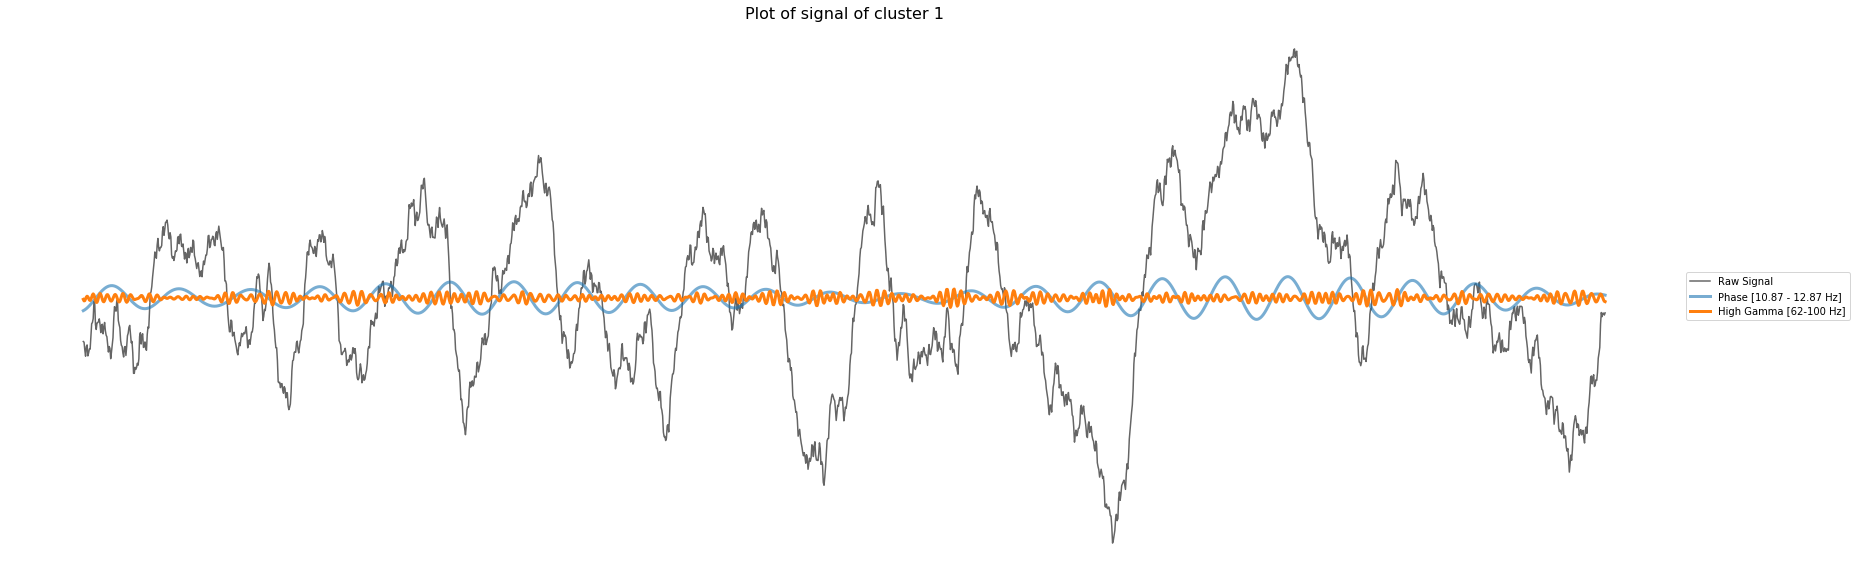

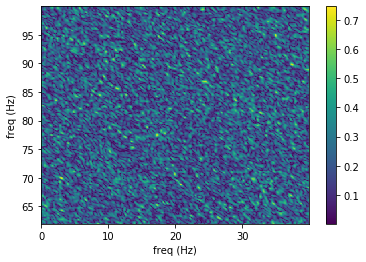

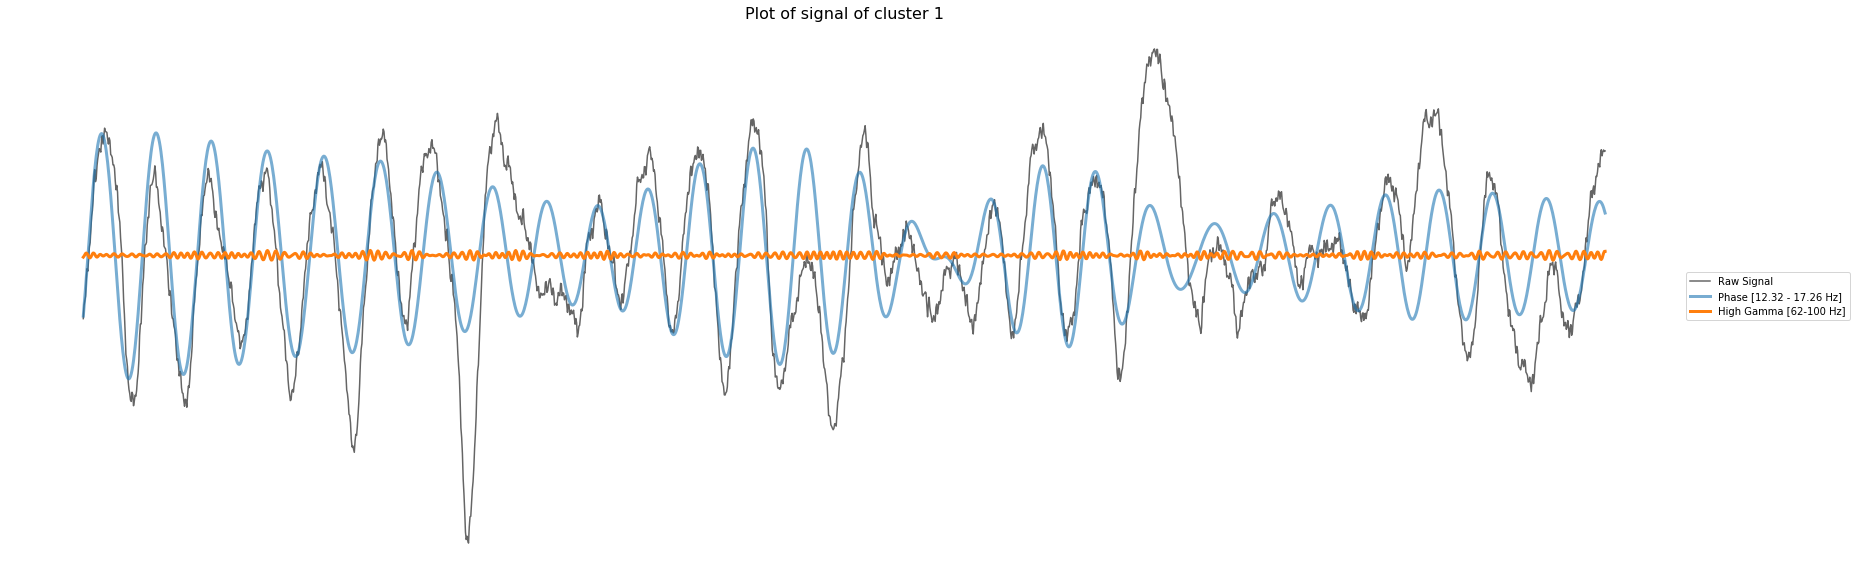

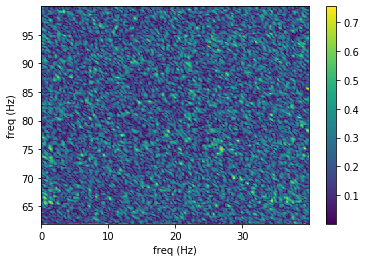

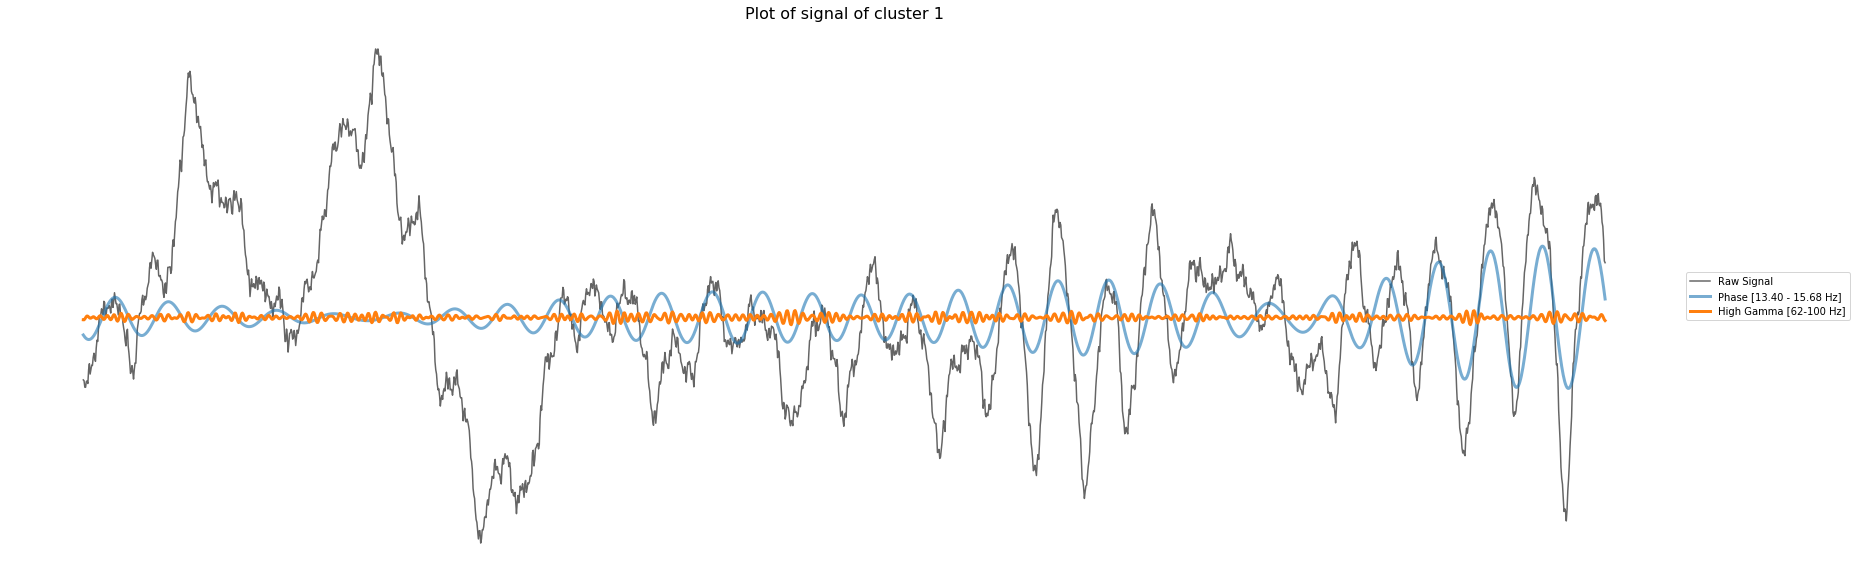

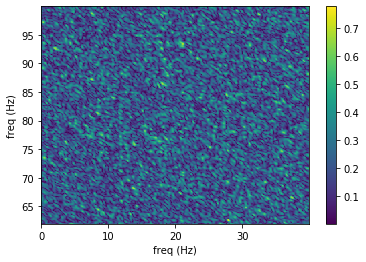

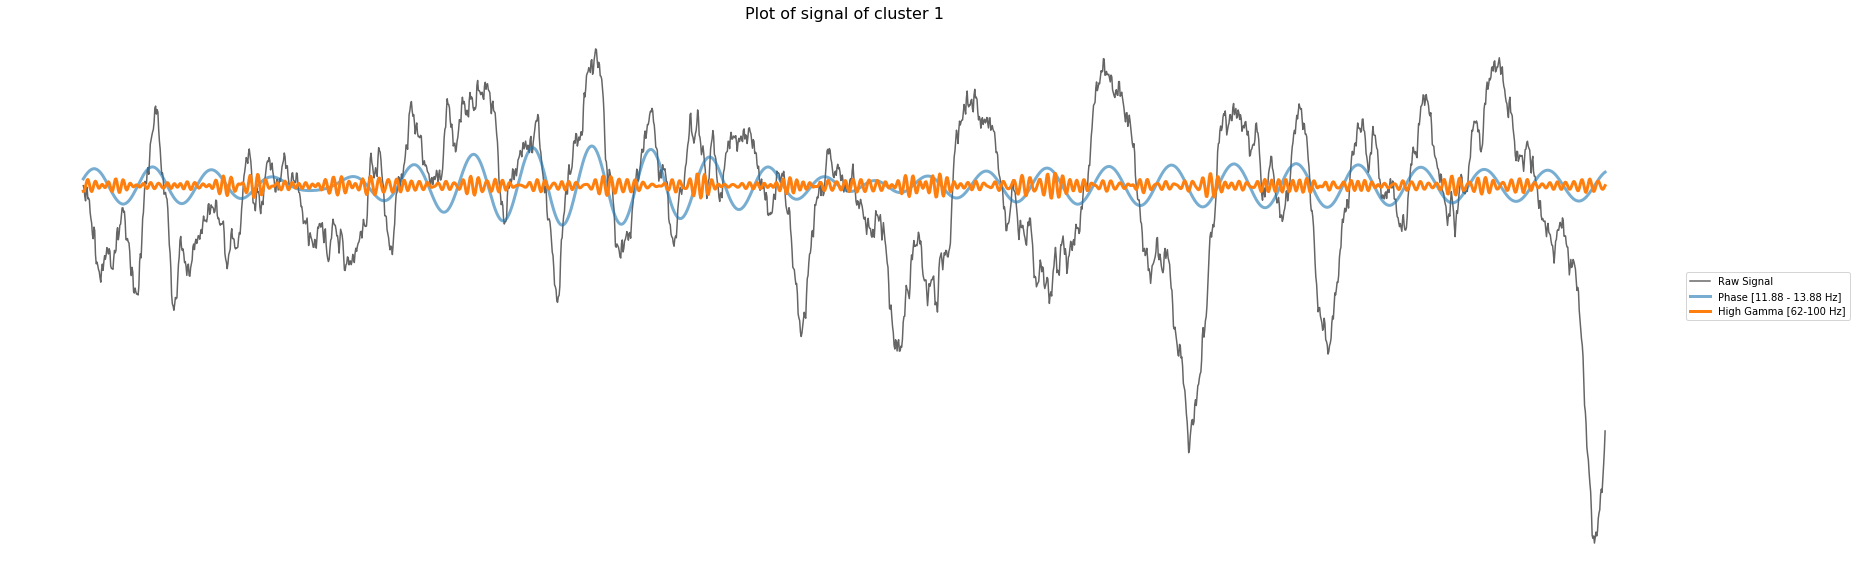

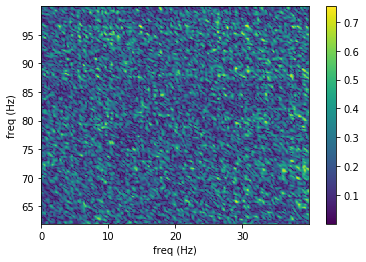

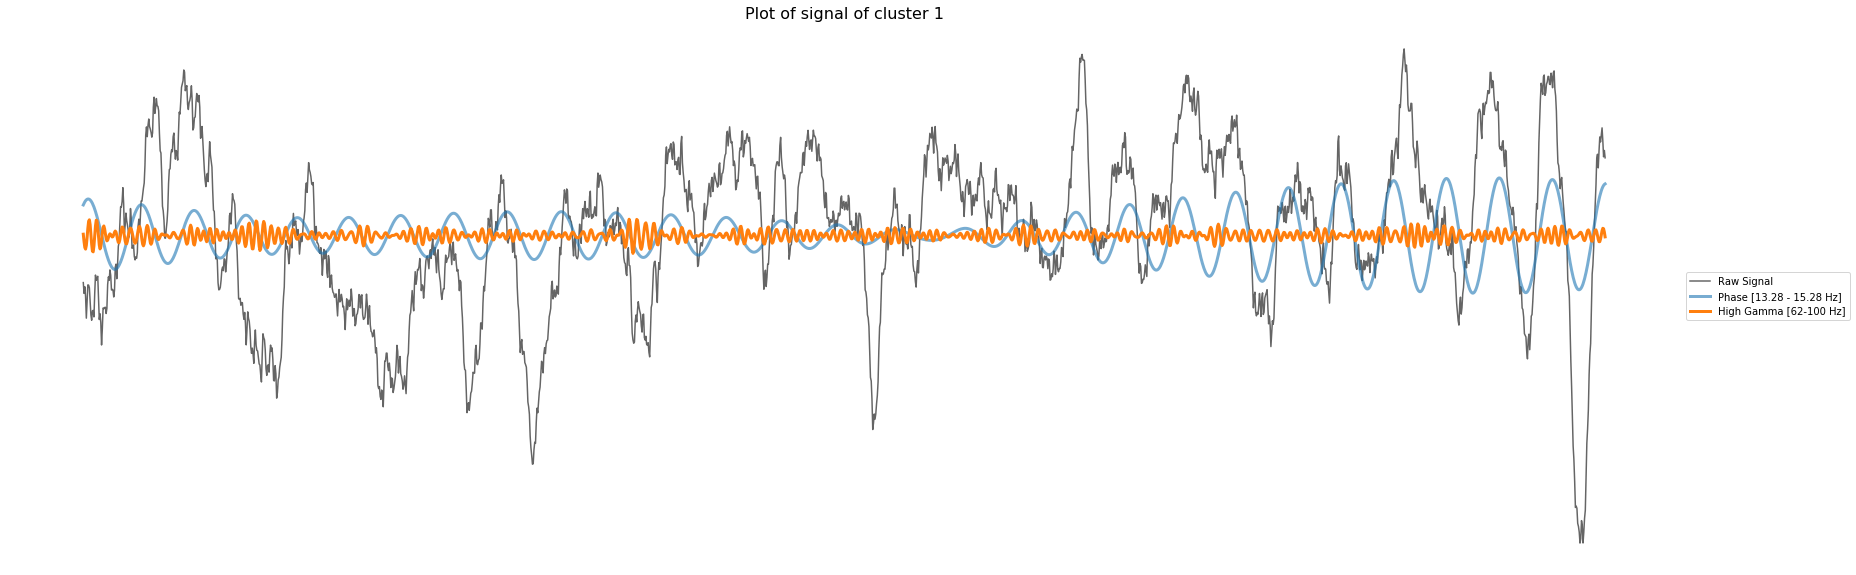

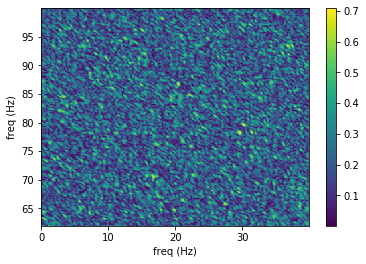

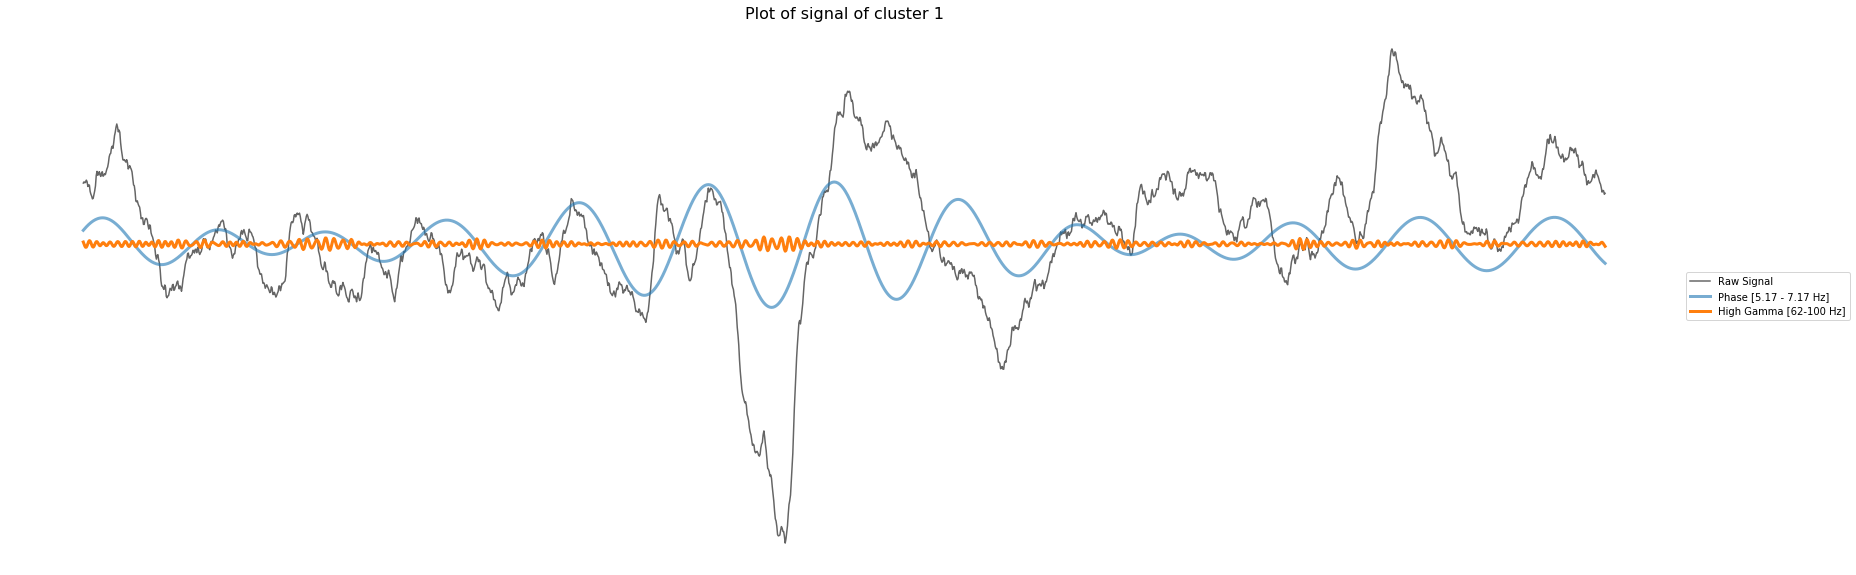

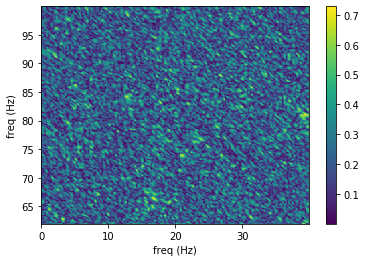

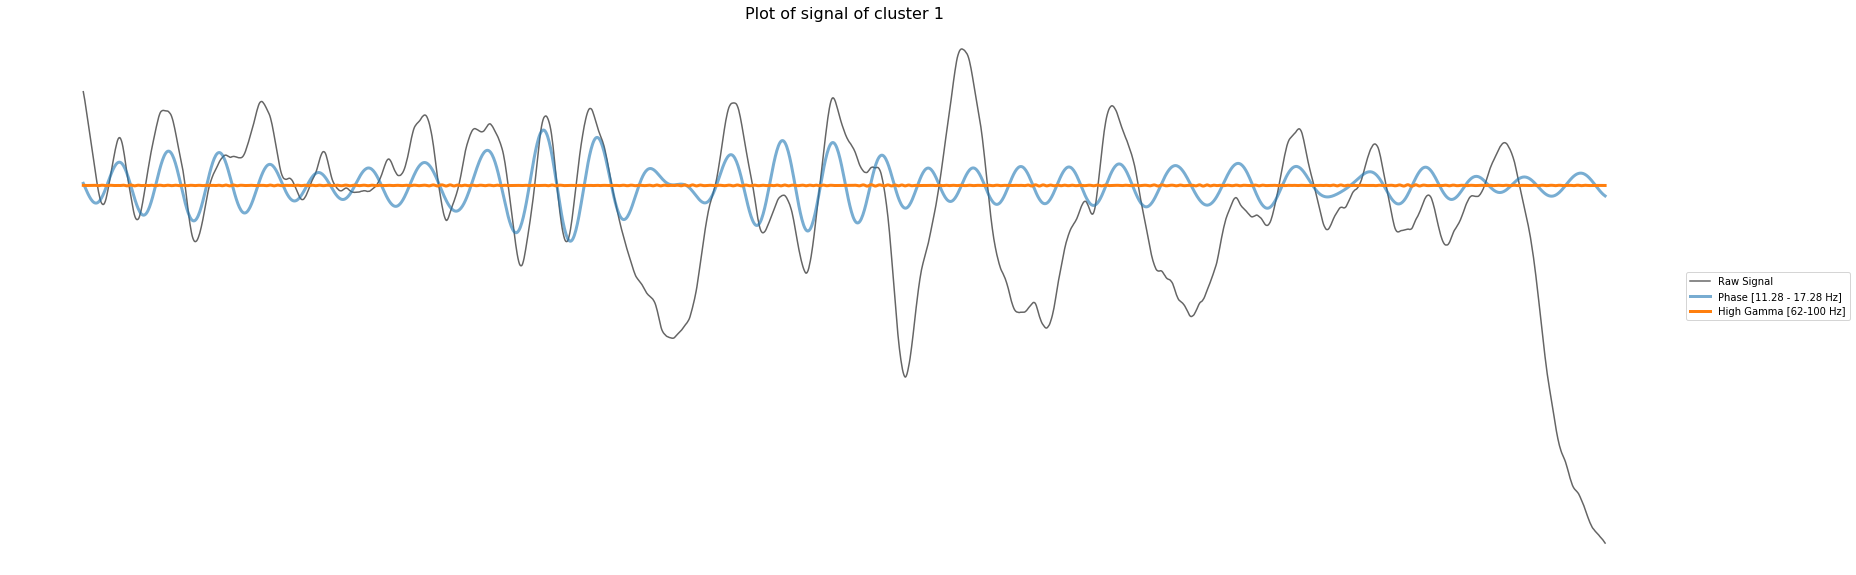

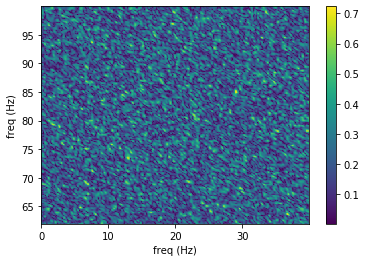

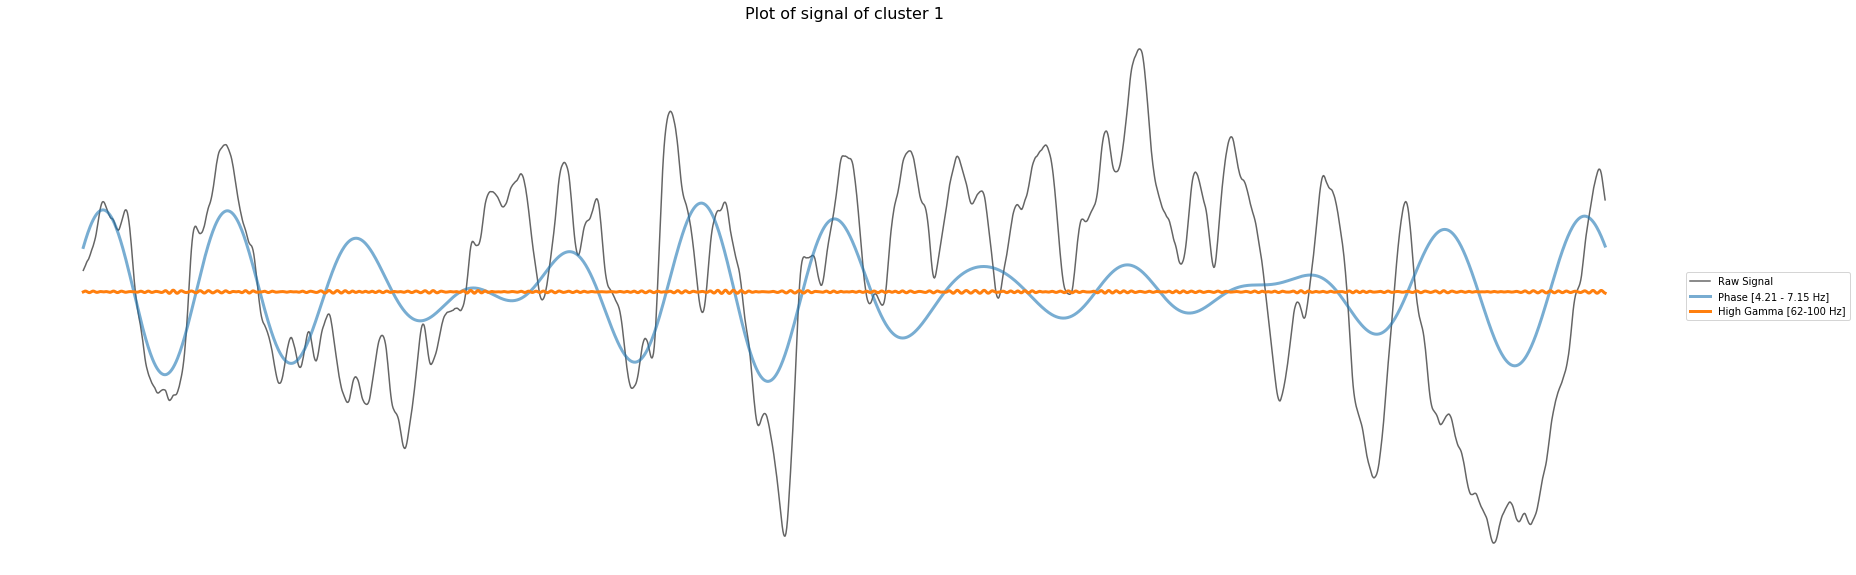

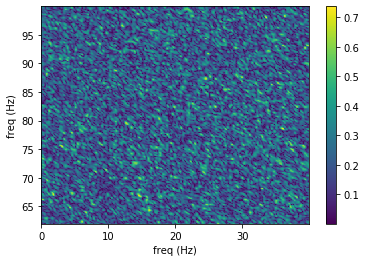

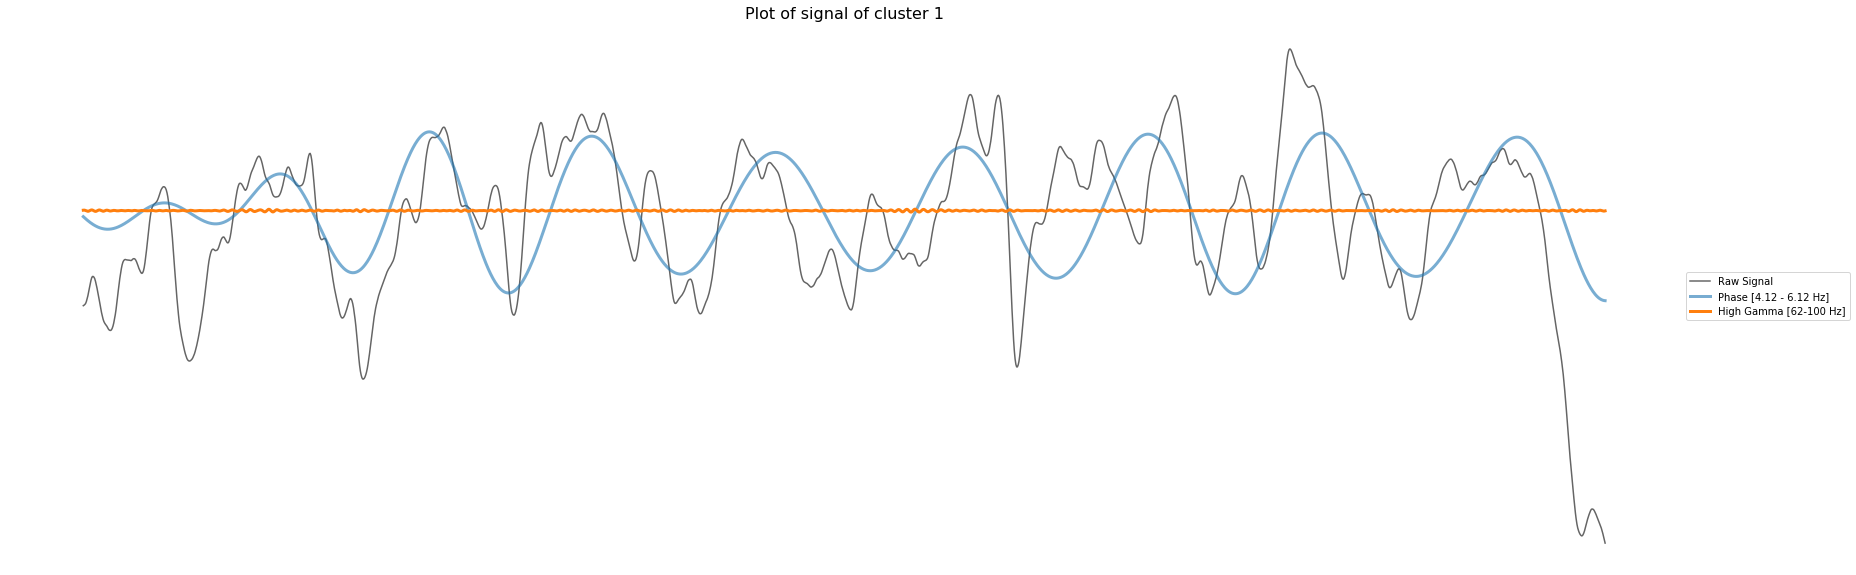

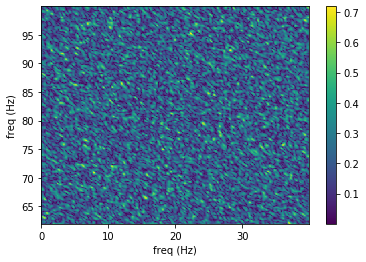

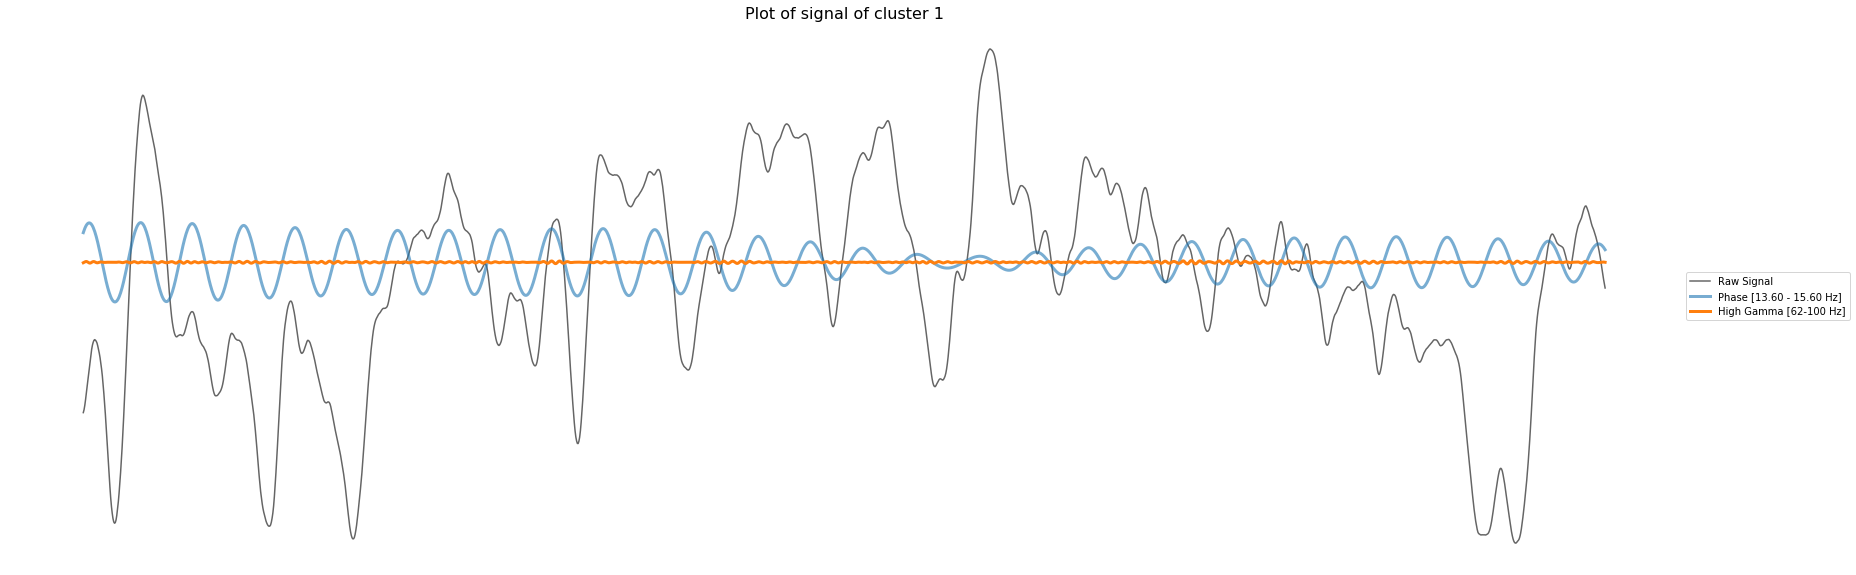

In [6]:
for ii in range(0,10):
    
    # choose subject from a cluster

    ### CLUSTER 1
    sig = data[cluster1_idx[ii]]

    # compute phase band
    lower_phase = psd_cf[cluster1_idx[ii]] - (psd_bw[cluster1_idx[ii]] / 2)
    upper_phase = psd_cf[cluster1_idx[ii]] + (psd_bw[cluster1_idx[ii]] / 2)

    # # compute phase band
    phase_providing_band = [lower_phase, upper_phase]; 

    # use butter bandpass filter to extract this frequency range
    phase_data = pacf.butter_bandpass_filter(sig, phase_providing_band[0], phase_providing_band[1], round(float(fs)));\

    # hilbert transfer data
    phase_data_hilbert = hilbert(phase_data);

    # calculate the phase of the signal by using angle 
    phase_data_angle = np.angle(phase_data_hilbert);

    # set range of the band 
    amplitude_providing_band = [62,100]

    # use butter bandpass filter to extract this frequency range
    amp_data = pacf.butter_bandpass_filter(sig, amplitude_providing_band[0], amplitude_providing_band[1], round(float(fs)));

    # hilbert transform data
    amp_data_hilbert = hilbert(amp_data);

    # calculate absolute values
    amp_data_abs = abs(amp_data_hilbert);  

    
    # plot biocoherence 
    #sig = sig[plt_time[0]:plt_time[1]]
    nn = len(sig)
    t = np.linspace(0, 100, nn)
    
    freq1, freq2, bicoh = polycoherence(sig, fs, flim1=(62, 100), flim2=(0, 40), **kw)
    plot_polycoherence(freq1, freq2, bicoh)
    plt.show()

    plt.figure(figsize = (30,10));
    plt.plot((sig[plt_time[0]:plt_time[1]]),label= 'Raw Signal', color='black', alpha=.6)
    plt.plot((phase_data_hilbert[plt_time[0]:plt_time[1]]),
             label= 'Phase [{0:.2f} - {1:.2f} Hz]'.format(phase_providing_band[0], phase_providing_band[1]),
             linewidth=3, alpha=.6)
    plt.plot((amp_data_hilbert[plt_time[0]:plt_time[1]]),label= 'High Gamma [62-100 Hz]',
             linewidth=3)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('Plot of signal of cluster 1', size=16)
    plt.axis('off')
    plt.show()

In [7]:
# notes to self

# 1 PACtools
from pactools import Comodulogram, REFERENCES
from pactools import simulate_pac

# 2 TensorPAC
from tensorpac import Pac
from tensorpac.signals import pac_signals_tort

# 3 polycoherence
from polycoherence import _plot_signal, polycoherence, plot_polycoherence
from math import pi
from scipy.fftpack import next_fast_len


# note: all spectra per cluster together. 

C:\Users\jaapv\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\jaapv\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\jaapv\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


### Averaged bicoherence of cluster 0 and 1

In [11]:
bicoh_total_clus0 = np.zeros((1500,1500))
bicoh_total_clus1 = np.zeros((1500,1500))

for ii in range(len(cluster0_idx)):
    
    # choose subject from a cluster

    ### CLUSTER 0
    sig = data[cluster0_idx[ii]] 

    # plot biocoherence 
    #sig = sig[plt_time[0]:plt_time[1]]
    nn = len(sig)
    t = np.linspace(0, 100, nn)
    
    freq1, freq2, bicoh = polycoherence(sig, fs, flim1=(0, 150), flim2=(0, 150), **kw)

    bicoh_total_clus0 = bicoh_total_clus0 + bicoh
    
for ii in range(len(cluster1_idx)):
    
    # choose subject from a cluster

    ### CLUSTER 1
    sig = data[cluster1_idx[ii]]  

    # plot biocoherence 
    #sig = sig[plt_time[0]:plt_time[1]]
    nn = len(sig)
    t = np.linspace(0, 100, nn)
    
    freq1, freq2, bicoh = polycoherence(sig, fs, flim1=(0, 150), flim2=(0, 150), **kw)

    bicoh_total_clus1 = bicoh_total_clus1 + bicoh

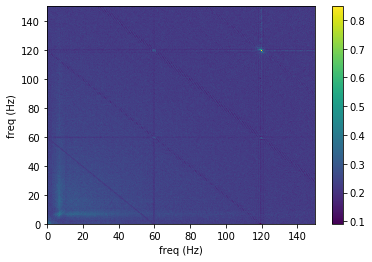

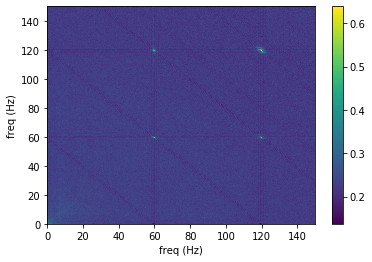

In [12]:
plot_polycoherence(freq1, freq2, (bicoh_total_clus0 / len(cluster0_idx)))
plot_polycoherence(freq1, freq2, (bicoh_total_clus1 / len(cluster1_idx)))

## Plotting the bicoherence of full channels

In [3]:
# Set directory in which the data structure can be found
os.chdir(r'C:\Users\jaapv\Desktop\master\VoytekLab')

# Use Pickle to load data
load_data = open('clean_db.pkl','rb')
clean_db = pickle.load(load_data)

In [6]:
# Extract variables for clean_db
subj_name   = clean_db['subj_name']
subj        = clean_db['subj']
ch          = clean_db['ch']
locs        = clean_db['locs']
dat_name    = clean_db['dat_name']
data        = clean_db['data']
pac_rhos    = clean_db['pac_rhos']
resamp_zvals = clean_db['resamp_zvals']
resamp_pvals = clean_db['resamp_pvals']
psd_params  = clean_db['psd_params']
backgr_params = clean_db['backgr_params']
rd_sym      = clean_db['rd_sym']
pt_sym      = clean_db['pt_sym']
bursts      = clean_db['bursts']
period      = clean_db['period']
volt_amp    = clean_db['volt_amp']
fs          = clean_db['fs']


# For some variables, calculate the mean, median and/or STD
mean_rd_sym     = [np.mean(rd_sym[ii]) for ii in range(len(rd_sym))]
median_rd_sym   = [np.median(rd_sym[ii]) for ii in range(len(rd_sym))]
std_rd_sym      = [np.std(rd_sym[ii]) for ii in range(len(rd_sym))]

mean_pt_sym     = [np.mean(pt_sym[ii]) for ii in range(len(pt_sym))]
median_pt_sym   = [np.median(pt_sym[ii]) for ii in range(len(pt_sym))]
std_pt_sym      = [np.std(pt_sym[ii]) for ii in range(len(pt_sym))]

median_volt_amp = [np.median(volt_amp[ii]) for ii in range(len(volt_amp))]
median_period   = [np.median(period[ii]) for ii in range(len(period))]

# Split psd_params into the Central Frequency, Amplitude and BandWidth
psd_cf          = [psd_params[ii][0] for ii in range(len(psd_params))]
psd_amp         = [psd_params[ii][1] for ii in range(len(psd_params))]
psd_bw          = [psd_params[ii][2] for ii in range(len(psd_params))]

# Also split the background_params into seperate parameters
backgr_offset = [backgr_params[ii][0] for ii in range(len(backgr_params))]
backgr_knee   = [backgr_params[ii][1] for ii in range(len(backgr_params))]
backgr_exp  = [backgr_params[ii][2] for ii in range(len(backgr_params))]

clean_db.clear()

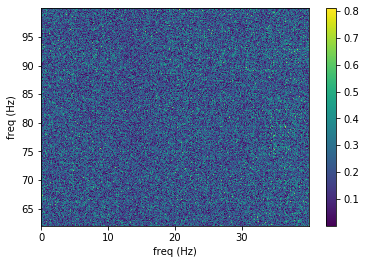

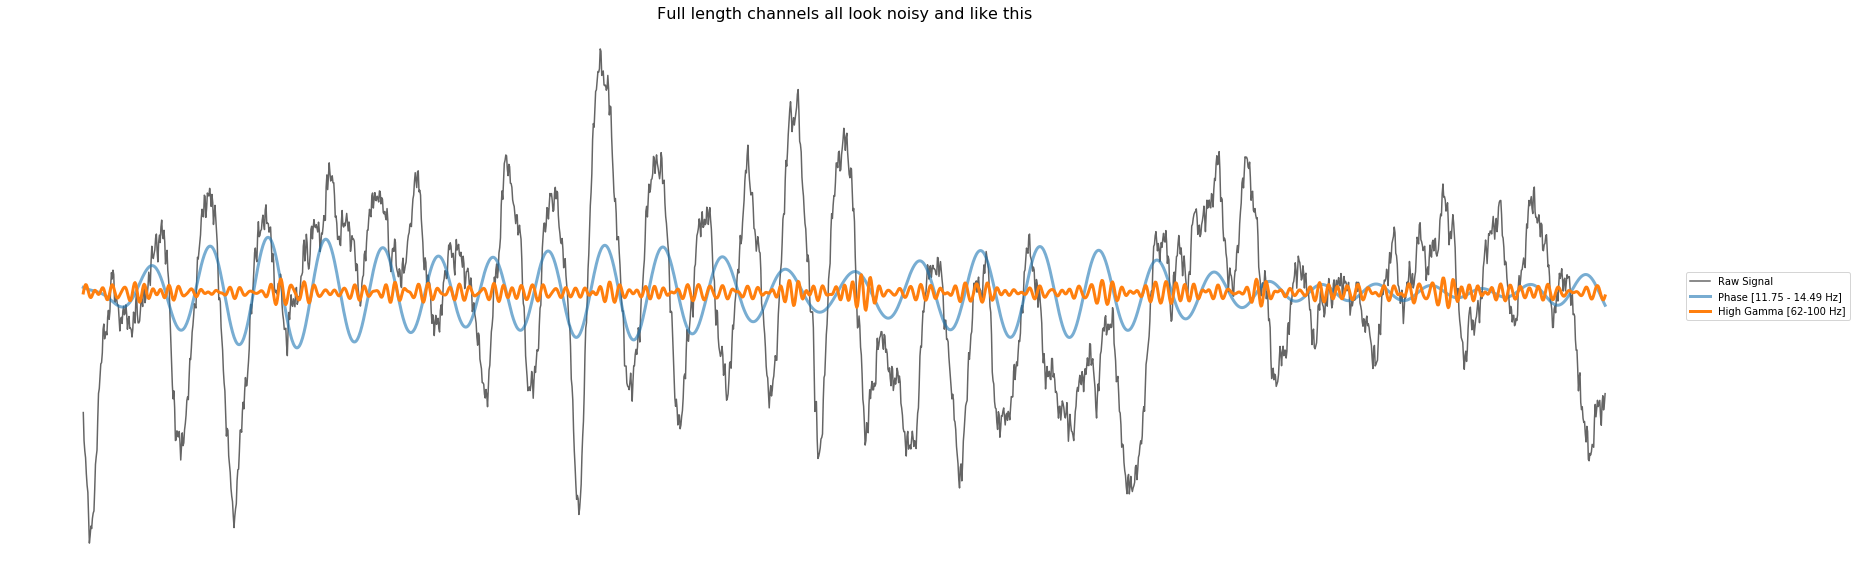

In [9]:
plt_time = [10 * fs, 12* fs]

for ii in range(0,1):

    ### CLUSTER 0
    sig = data[ii]

    # compute phase band
    lower_phase = psd_cf[ii] - (psd_bw[ii] / 2)
    upper_phase = psd_cf[ii] + (psd_bw[ii] / 2)

    # phase providing band
    phase_providing_band = [lower_phase, upper_phase]; 

    # use butter bandpass filter to extract this frequency range
    phase_data = pacf.butter_bandpass_filter(sig, phase_providing_band[0], phase_providing_band[1], round(float(fs)));\

    # hilbert transfer data
    phase_data_hilbert = hilbert(phase_data);

    # calculate the phase of the signal by using angle 
    phase_data_angle = np.angle(phase_data_hilbert);

    # set range of the band 
    amplitude_providing_band = [62, 100]

    # use butter bandpass filter to extract this frequency range
    amp_data = pacf.butter_bandpass_filter(sig, amplitude_providing_band[0], amplitude_providing_band[1], round(float(fs)));

    # hilbert transform data
    amp_data_hilbert = hilbert(amp_data);

    # calculate absolute values
    amp_data_abs = abs(amp_data_hilbert);  

    # plot biocoherence 
    #sig = sig[plt_time[0]:plt_time[1]]
    nn = len(sig)
    t = np.linspace(0, 100, nn)
    
    kw = dict(nperseg=nn // 10, noverlap=nn // 20, nfft=next_fast_len(nn // 2))
    
    freq1, freq2, bicoh = polycoherence(sig, fs, flim1=(62, 100), flim2=(0, 40), **kw)
    plot_polycoherence(freq1, freq2, bicoh)
    plt.show()

    # plot signal
    plt.figure(figsize=(30,10))
    #lt.subplot(outer_grid[0, 1:])
    plt.plot((sig[plt_time[0]:plt_time[1]]),label= 'Raw Signal', color='black', alpha=.6)
    plt.plot((phase_data_hilbert[plt_time[0]:plt_time[1]]),
             label= 'Phase [{0:.2f} - {1:.2f} Hz]'.format(phase_providing_band[0], phase_providing_band[1]),
             linewidth=3, alpha=.6)
    plt.plot((amp_data_hilbert[plt_time[0]:plt_time[1]]),label= 'High Gamma [62-100 Hz]',
             linewidth=3)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('Full length channels all look noisy and like this', size=16)
    plt.axis('off')
    plt.show()